In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
PA = pd.read_csv('Files/CR-studentexperiences.csv', header = 1)

**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [25]:
EX = pd.to_datetime(PA["end.1"][9:]) - pd.to_datetime(PA["start.1"][9:])
CR = pd.to_datetime(PA["end.2"][9:]) - pd.to_datetime(PA["start.2"][9:])

Timedelta('0 days 00:08:07.333333333')

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, "Participant's Excel behavior distribution")

Text(0.5, 0, 'Times')

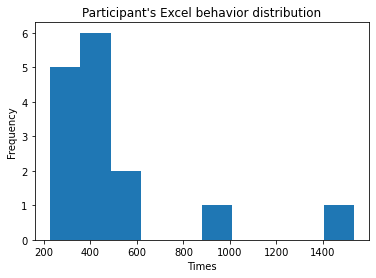

In [29]:
EX.mean()
EX.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Excel behavior distribution")
plt.xlabel("Times") 
plt.savefig(os.path.join('Pics/Guilding Analysis/EX-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

Timedelta('0 days 00:12:44.466666666')

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, "Participant's Character recorder behavior distribution")

Text(0.5, 0, 'Times')

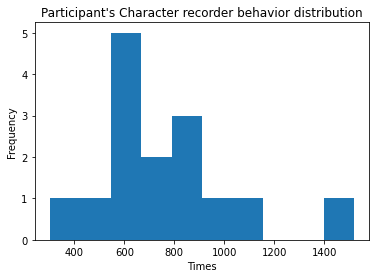

In [30]:
CR.mean()
CR.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Character recorder behavior distribution")
plt.xlabel("Times") 
plt.savefig(os.path.join('Pics/Guilding Analysis/CR-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

We find out that the main value can not represent the user's time spent on the software based on the graph. So we will keep using the Box chart to explore more information. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5fa8f1a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5fa8fd100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5fa8f1610>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe5fa8fd7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5fa8fdb50>,
 'means': []}

([<matplotlib.axis.XTick at 0x7fe5a89c1430>,
 [Text(1, 0, 'Excel'), Text(2, 0, 'Character Recorder')])

Text(0.5, 1.0, 'Boxplot for Excel and Character Recorder')

Text(0, 0.5, 'time spent')

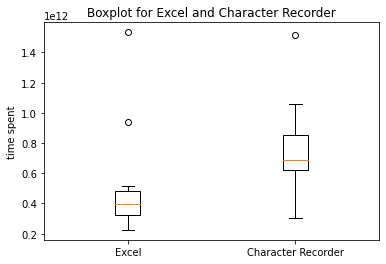

In [35]:
data_1 = EX
data_2 = CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Excel", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


After we look through Boxplot, we find out that there are two outliers in EX and one in CR. So, in the next step, We will remove those outliers and get their mean and median time.

In [36]:
def outlier_remove(col):

    mid = col.quantile(0.75) - col.quantile(0.25)

    top = col.quantile(0.75) + 1.5 * mid
    bot = col.quantile(0.25) - 1.5 * mid

    def remove(x):
        if x <= top and x >= bot:
            return x

    return col.map(remove)

In [37]:
New_CR = outlier_remove(CR).dropna()
New_EX = outlier_remove(EX).dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5fa9c56a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5fa9c5ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5fa9c5340>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe6090c03a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6090c0700>,
 'means': []}

([<matplotlib.axis.XTick at 0x7fe5fa9955b0>,
 [Text(1, 0, 'New Excel'), Text(2, 0, 'New Character Recorder')])

Text(0.5, 1.0, 'Boxplot for Excel and Character Recorder')

Text(0, 0.5, 'time spent')

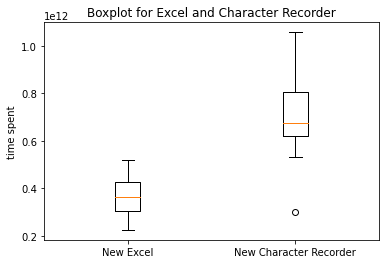

In [38]:
data_1 = New_EX
data_2 = New_CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["New Excel", "New Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/New-Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [40]:
print('Excel Median time spent : ' + str(New_EX.median()))
print('Excel Mean time spent : ' +  str(New_EX.mean()))

Excel Median time spent : 0 days 00:06:04
Excel Mean time spent : 0 days 00:06:11.846153846


In [41]:
print('Character Recorder Median time spent : ' + str(New_CR.median()))
print('Character Recorder Mean time spent : ' +  str(New_CR.mean()))

Character Recorder Median time spent : 0 days 00:11:14.500000
Character Recorder Mean time spent : 0 days 00:11:50.571428571


After we delete outlier, we will get the t-test result

In [13]:
stats.ttest_rel(EX, CR)

Ttest_relResult(statistic=-1.000000850339776, pvalue=0.3281828595440006)

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

<Figure size 648x504 with 0 Axes>

<AxesSubplot:ylabel='use my terms'>

Text(0.5, 1.0, 'How many new ontology add by participants in each research')

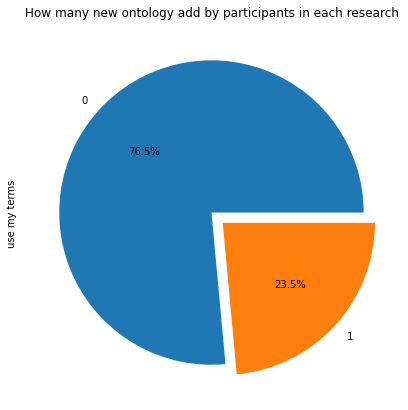

In [14]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new ontology add by participants in each research")
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?